In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("D:/Internship Jul-Aug 2023/Project 2/creditcard.csv", low_memory=False)
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


In [3]:
df.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

In [4]:
df.tail()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN


In [5]:
df = df.iloc[:-2, :] #Since, only 1 feature has 2 values in last 2 row index, rest of the columns, doesnt, I've eliminated last two values from the dataset.
df.tail() 

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149995,0.0,0.040674,74.0,Male,North,2100.0,Ownhouse,Non-officer,Professional,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0,Good
149996,0.0,0.299745,44.0,Male,North,5584.0,Ownhouse,Self_Emp,Professional,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2,Good
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good


In [6]:
df.shape

(150000, 18)

In [7]:
df.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome.1                         29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

In [8]:
duplicated_columns = []
for i in range (df.shape[1]): #Iterating all the columns of the dataset.
    a = df.iloc[:, i] #accessing the values of the i collumns
    for j in range(i+1, df.shape[1]): #taking i+1 as I dont want to compare the first collumn with itself. writing sf.shape[1] to iterate the loop until the last columns in i.
        b = df.iloc[:, j] #accessing the values of collumn iterating throug j.
        if a.equals(b):
            duplicated_columns.append(df.columns.values[j])
duplicated_columns

['MonthlyIncome.1']

In [9]:
#since MonthlyInome column is duplicate, I am dropping it.

In [10]:
df = df.drop(["MonthlyIncome.1"], axis=1)

In [11]:
df.shape

(150000, 17)

In [12]:
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,0,Good


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [14]:
df["NumberOfDependents"] = df["NumberOfDependents"].astype(float)

In [15]:
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,0.0,Good


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [17]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=12)

In [20]:
x_test.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
40802,1.0,0.853506,67.0,Male,West,2513.0,Rented,Officer2,Professional,3.0,1.146778,7.0,3.0,1.0,0.0,1.0
97167,1.0,0.596972,53.0,Male,North,NaN,Ownhouse,Non-officer,Graduate,0.0,2620.000000,13.0,0.0,1.0,0.0,0.0
14472,0.0,0.308867,43.0,Female,North,29000.0,Ownhouse,Officer1,Post-Grad,0.0,0.191476,15.0,0.0,3.0,0.0,4.0
2258,0.0,0.032604,66.0,Male,South,5200.0,Ownhouse,Self_Emp,PhD,0.0,0.641992,9.0,0.0,0.0,0.0,0.0
61557,0.0,0.621414,78.0,Male,Central,NaN,Ownhouse,Officer2,Professional,0.0,4865.000000,16.0,0.0,2.0,0.0,0.0


In [21]:
def num_cat(df):
    numerical = df.select_dtypes(exclude="object")
    categorical = df.select_dtypes(include="object")
    return numerical, categorical

In [22]:
x_train_numerical, x_train_categorical = num_cat(x_train)
x_test_numerical, x_test_categorcal = num_cat(x_test)

In [23]:
x_train_categorical.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education
7120,Male,South,Ownhouse,Self_Emp,Matric
15178,Female,North,Ownhouse,Self_Emp,Post-Grad
148382,Male,South,Ownhouse,Self_Emp,Matric
30064,Male,North,Ownhouse,Non-officer,Graduate
54607,Male,East,Rented,Self_Emp,Professional


## categorial conversion

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [25]:
ct = ColumnTransformer(transformers=[
    ("tnf1", OneHotEncoder(sparse=False, drop="first"), ["Gender", "Rented_OwnHouse", "Region"], ),
    ("tnf2", OrdinalEncoder(), ["Occupation", "Education"]),
], remainder="passthrough")
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Gender', 'Rented_OwnHouse', 'Region']),
                                ('tnf2', OrdinalEncoder(),
                                 ['Occupation', 'Education'])])

In [26]:
categorical_x_train_transformed = ct.fit_transform(x_train_categorical)
categorical_x_train_transformed = pd.DataFrame(categorical_x_train_transformed)
categorical_x_train_transformed.head()

C:\Users\fsc\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,4.0,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0


In [27]:
categorical_x_train_transformed.columns = ct.get_feature_names_out()
categorical_x_train_transformed.head()

,tnf1__Gender_Male,tnf1__Rented_OwnHouse_Rented,tnf1__Region_East,tnf1__Region_North,tnf1__Region_South,tnf1__Region_West,tnf2__Occupation,tnf2__Education
0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,4.0,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0


In [28]:
ct = ColumnTransformer(transformers=[
    ("tnf1", OneHotEncoder(sparse=False, drop="first"), ["Gender", "Rented_OwnHouse", "Region"]),
    ("tnf2", OrdinalEncoder(), ["Occupation", "Education"]),
], remainder="passthrough")

categorical_x_test_transformed = ct.fit_transform(x_test_categorcal)
categorical_x_test_transformed = pd.DataFrame(categorical_x_test_transformed)
categorical_x_test_transformed.head()

categorical_x_test_transformed.columns = ct.get_feature_names_out()
categorical_x_test_transformed.head()

C:\Users\fsc\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,tnf1__Gender_Male,tnf1__Rented_OwnHouse_Rented,tnf1__Region_East,tnf1__Region_North,tnf1__Region_South,tnf1__Region_West,tnf2__Occupation,tnf2__Education
0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
3,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0


In [29]:
categorical_x_train_transformed.isnull().sum()

tnf1__Gender_Male               0
tnf1__Rented_OwnHouse_Rented    0
tnf1__Region_East               0
tnf1__Region_North              0
tnf1__Region_South              0
tnf1__Region_West               0
tnf2__Occupation                0
tnf2__Education                 0
dtype: int64

In [30]:
categorical_x_train_transformed.describe()

,tnf1__Gender_Male,tnf1__Rented_OwnHouse_Rented,tnf1__Region_East,tnf1__Region_North,tnf1__Region_South,tnf1__Region_West,tnf2__Occupation,tnf2__Education
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.00000,120000.000000,120000.000000,120000.000000
mean,0.615117,0.426625,0.137150,0.226942,0.15755,0.185250,2.311783,2.292025
std,0.486570,0.494589,0.344007,0.418856,0.36432,0.388502,1.708761,1.638603
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,3.000000
75%,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,4.000000


In [31]:
categorical_x_train_transformed.shape

(120000, 8)

## Categorical EDA

In [32]:
unique = x_train_categorical["Gender"].unique()
print(unique)
print(len(unique))
x_train_categorical["Gender"].nunique()
x_train_categorical["Gender"].isnull().sum()
x_train_categorical["Gender"].isnull().sum()/len(x_train_categorical)

['Male' 'Female']
2


0.0

In [40]:
def stats(df, var):
    Unique = df[var].unique()
    Unique_without_null_values = df[var].nunique()
    null_value = df[var].isnull().sum()
    null_value_percentage = df[var].isnull().sum()/len(df)
    return Unique, Unique_without_null_values, null_value, null_value_percentage

In [41]:
Unique, Unique_without_null_values, null_value, null_value_percentage = stats(x_train_categorical, "Gender")

In [45]:
stats_data = []
for col in x_train_categorical.columns:
    Unique, Unique_without_null_values, null_value, null_value_percentage = stats(x_train_categorical, col)
    stats_data.append([col, Unique, Unique_without_null_values, null_value, null_value_percentage])
    #print(f"The unique values in {col} is: {Unique}, Unique values without null values are: {Unique_without_null_values}, Total Null Value: {null_value}, Null value %:{null_value_percentage}")
stats_data = pd.DataFrame(stats_data, columns=["Feature_Name", "Unique", "Unique_without_null_values", "null_value", "null_value_percentage"])
stats_data

,Feature_Name,Unique,Unique_without_null_values,null_value,null_value_percentage
0,Gender,"[Male, Female]",2,0,0.0
1,Region,"[South, North, East, Central, West]",5,0,0.0
2,Rented_OwnHouse,"[Ownhouse, Rented]",2,0,0.0
3,Occupation,"[Self_Emp, Non-officer, Officer1, Officer3, Of...",5,0,0.0
4,Education,"[Matric, Post-Grad, Graduate, Professional, PhD]",5,0,0.0


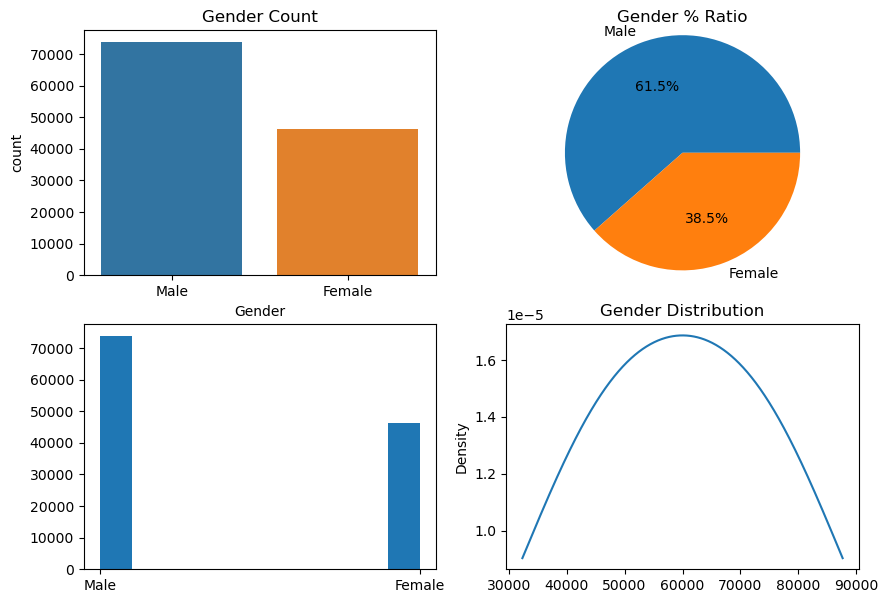

In [36]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.countplot(data=x_train_categorical, x=x_train_categorical["Gender"])
plt.title("Gender Count")
plt.subplot(2,2,2)
plt.pie(x_train_categorical["Gender"].value_counts(), radius=1.2, autopct="%1.1f%%", labels=x_train_categorical["Gender"].unique())
plt.title("Gender % Ratio")
plt.subplot(2,2,3)
plt.hist(x=x_train_categorical["Gender"])
plt.subplot(2,2,4)
x_train_categorical["Gender"].value_counts().plot(kind="kde")
plt.title("Gender Distribution")
plt.show()

In [46]:
def plotting_univariate(df, var):
    plt.figure(figsize=(10,7))
    plt.subplot(2,2,1)
    sns.countplot(data=df, x=df[var])
    plt.title(var+" Count")
    plt.subplot(2,2,2)
    plt.pie(df[var].value_counts(), radius=1.2, autopct="%1.1f%%", labels=df[var].unique())
    plt.title(var+" % Ratio")
    plt.subplot(2,2,3)
    plt.hist(x=df[var])
    plt.subplot(2,2,4)
    df[var].value_counts().plot(kind="kde")
    plt.title(var+" Distribution")
    plt.show()

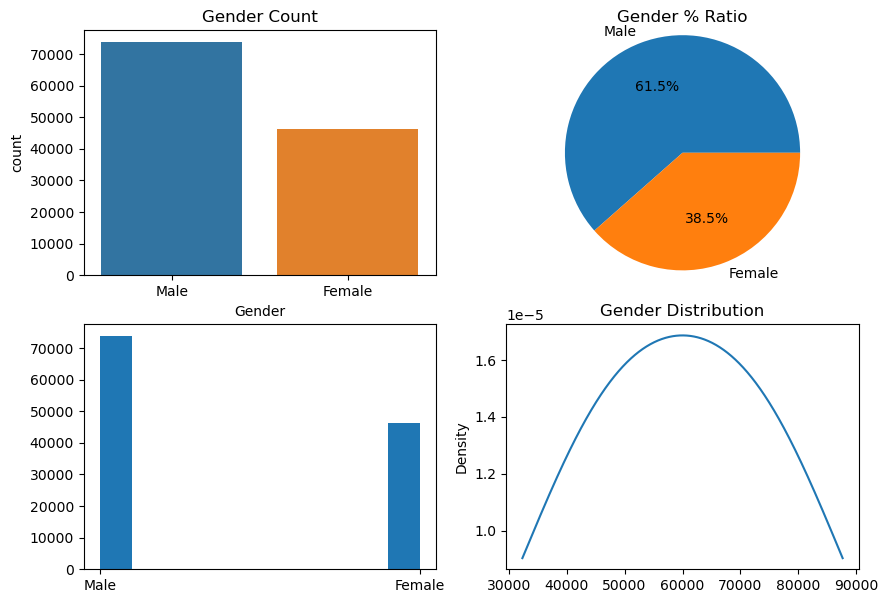

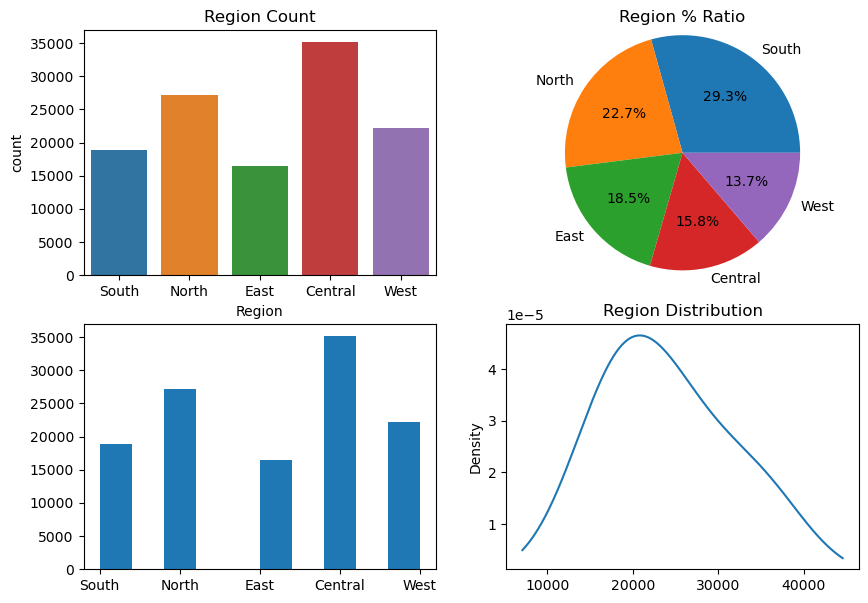

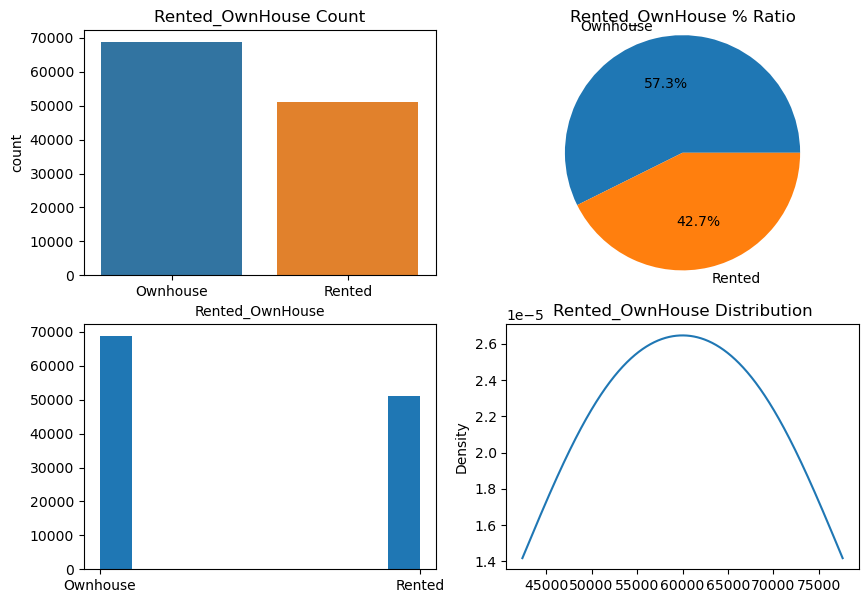

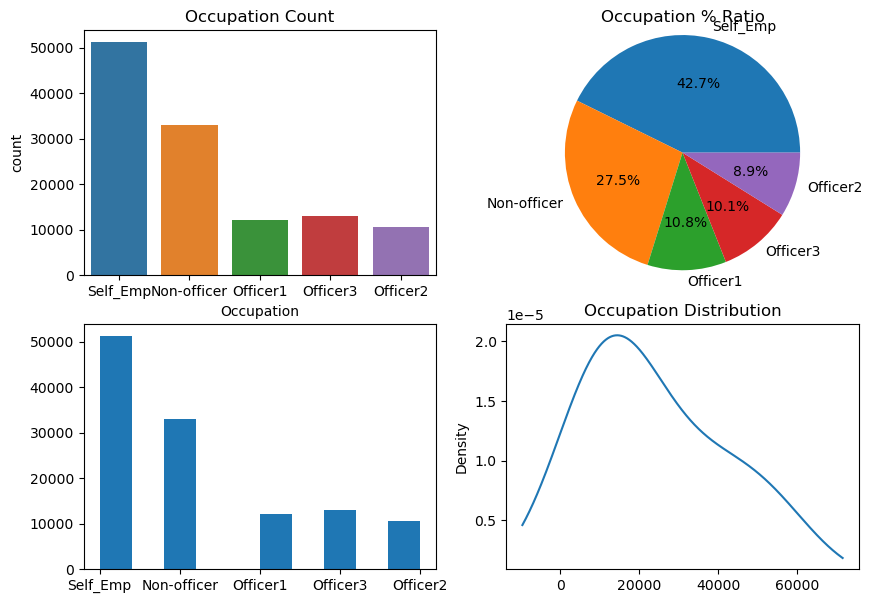

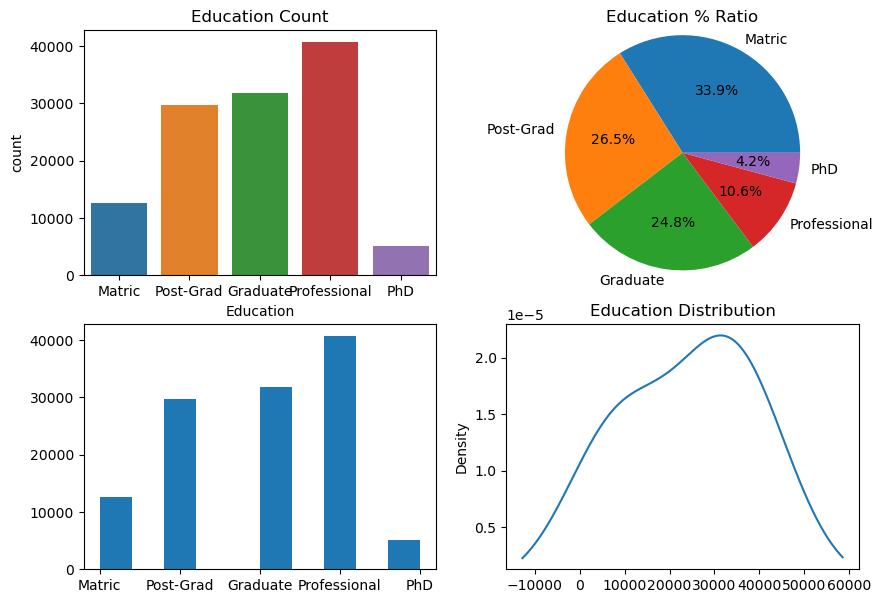

In [47]:
for col in x_train_categorical.columns:
    plotting_univariate(x_train_categorical, col)

### By-Variate Analysis

In [48]:
x_train_categorical.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education
7120,Male,South,Ownhouse,Self_Emp,Matric
15178,Female,North,Ownhouse,Self_Emp,Post-Grad
148382,Male,South,Ownhouse,Self_Emp,Matric
30064,Male,North,Ownhouse,Non-officer,Graduate
54607,Male,East,Rented,Self_Emp,Professional


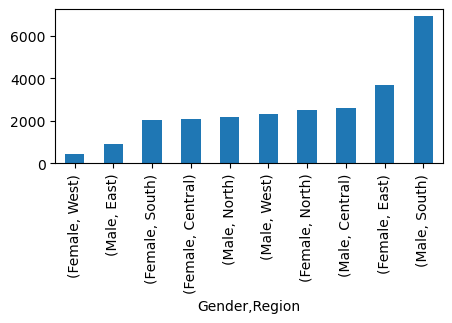

In [49]:
plt.figure(figsize=(5,2))
x_train_categorical.value_counts().groupby(["Gender", "Region"]).first().sort_values().plot.bar()
plt.show()

In [50]:
def comparision_plotting(df, var1, var2):
    plt.figure(figsize=(4,2))
    df.value_counts().groupby([var1, var2]).first().sort_values().plot.bar()
    plt.show()

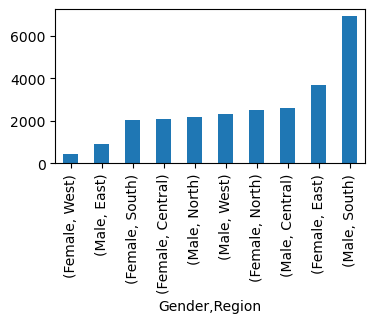

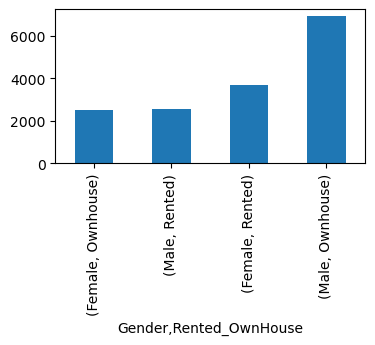

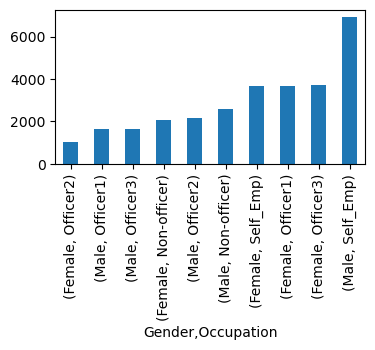

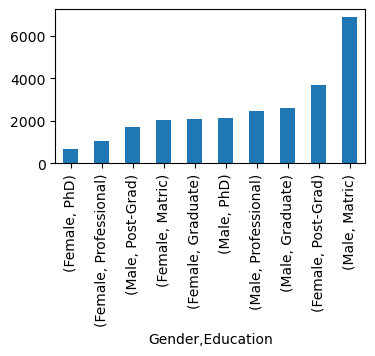

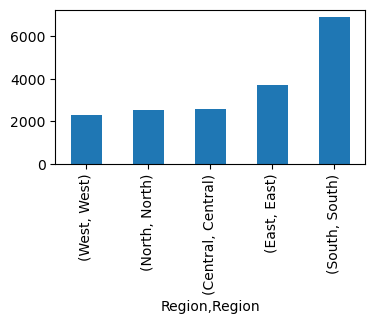

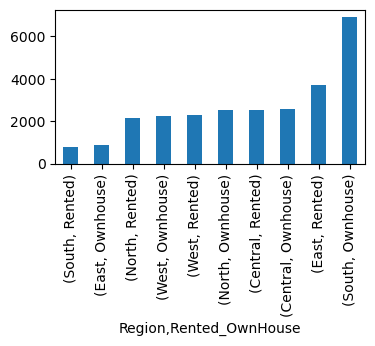

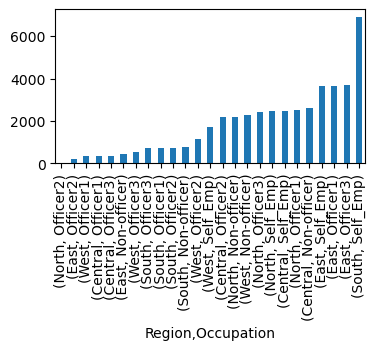

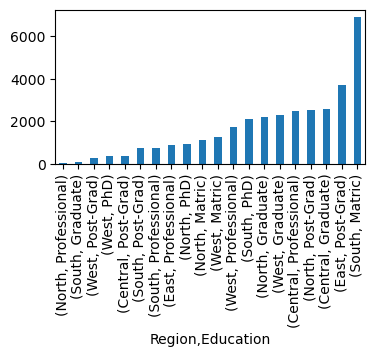

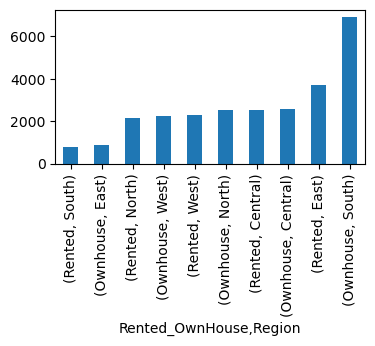

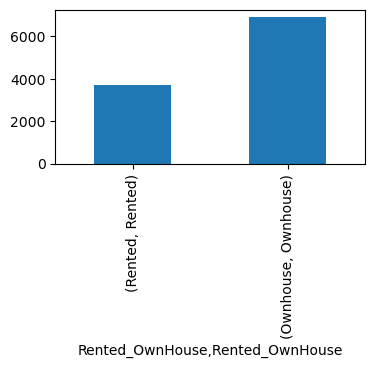

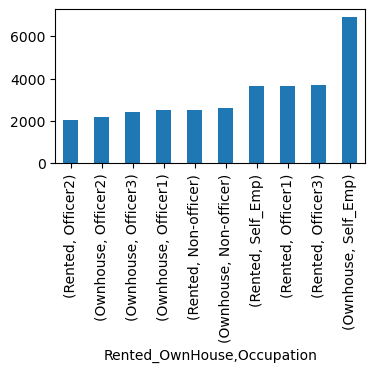

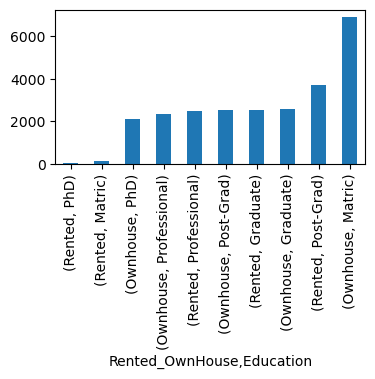

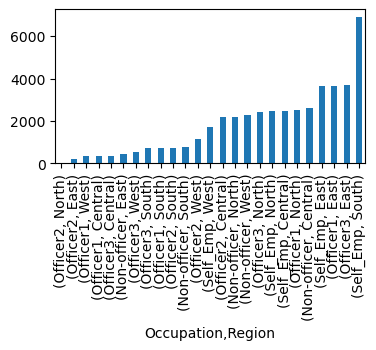

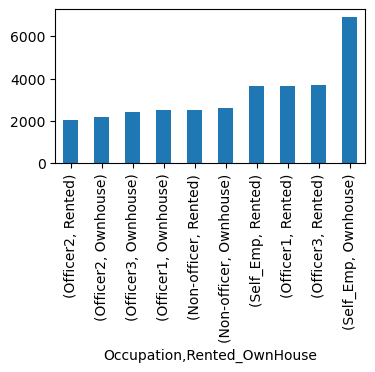

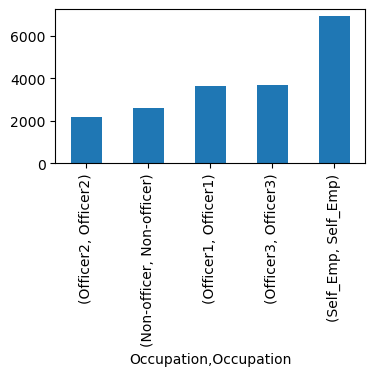

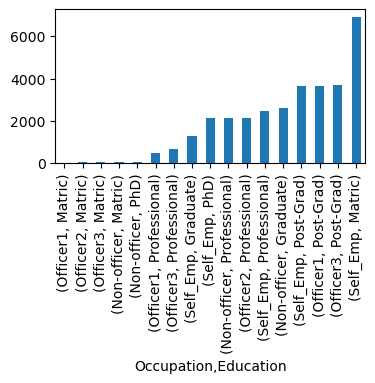

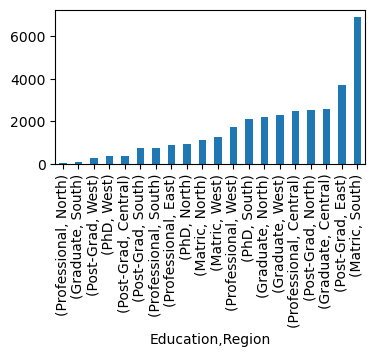

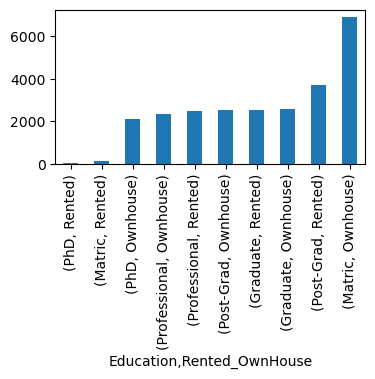

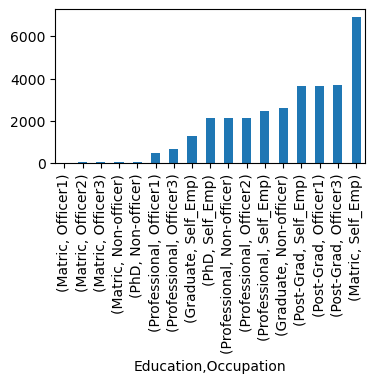

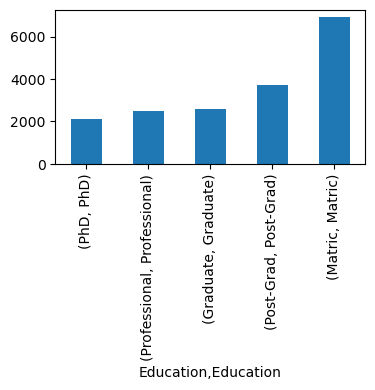

In [51]:
for col in x_train_categorical.columns:
    for j in x_train_categorical.iloc[:, 1:].columns:
        comparision_plotting(x_train_categorical, col, j)

In [52]:
a = pd.concat([x_train_categorical, y_train], axis=1)
a.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
7120,Male,South,Ownhouse,Self_Emp,Matric,Good
15178,Female,North,Ownhouse,Self_Emp,Post-Grad,Good
148382,Male,South,Ownhouse,Self_Emp,Matric,Bad
30064,Male,North,Ownhouse,Non-officer,Graduate,Good
54607,Male,East,Rented,Self_Emp,Professional,Good


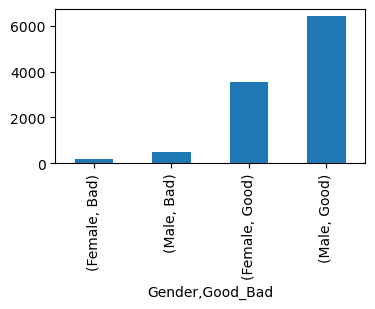

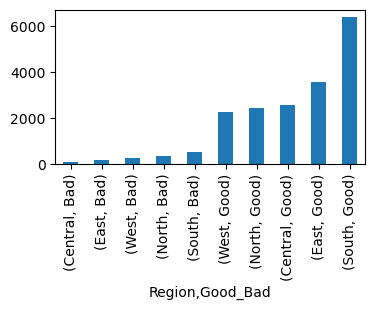

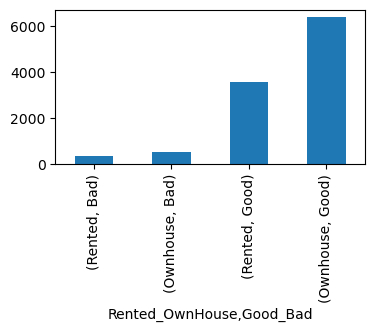

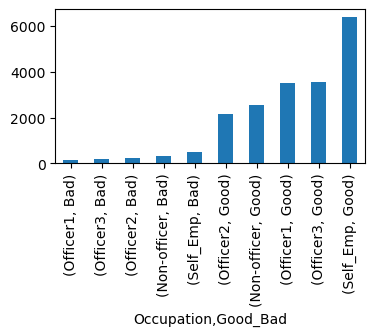

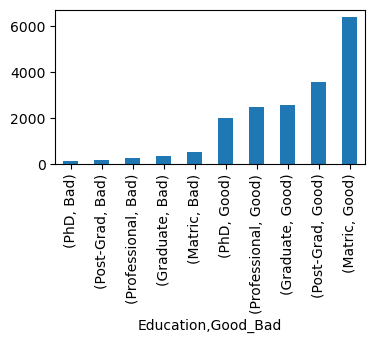

In [53]:
for col in x_train_categorical.columns:
    comparision_plotting(a, col, "Good_Bad")

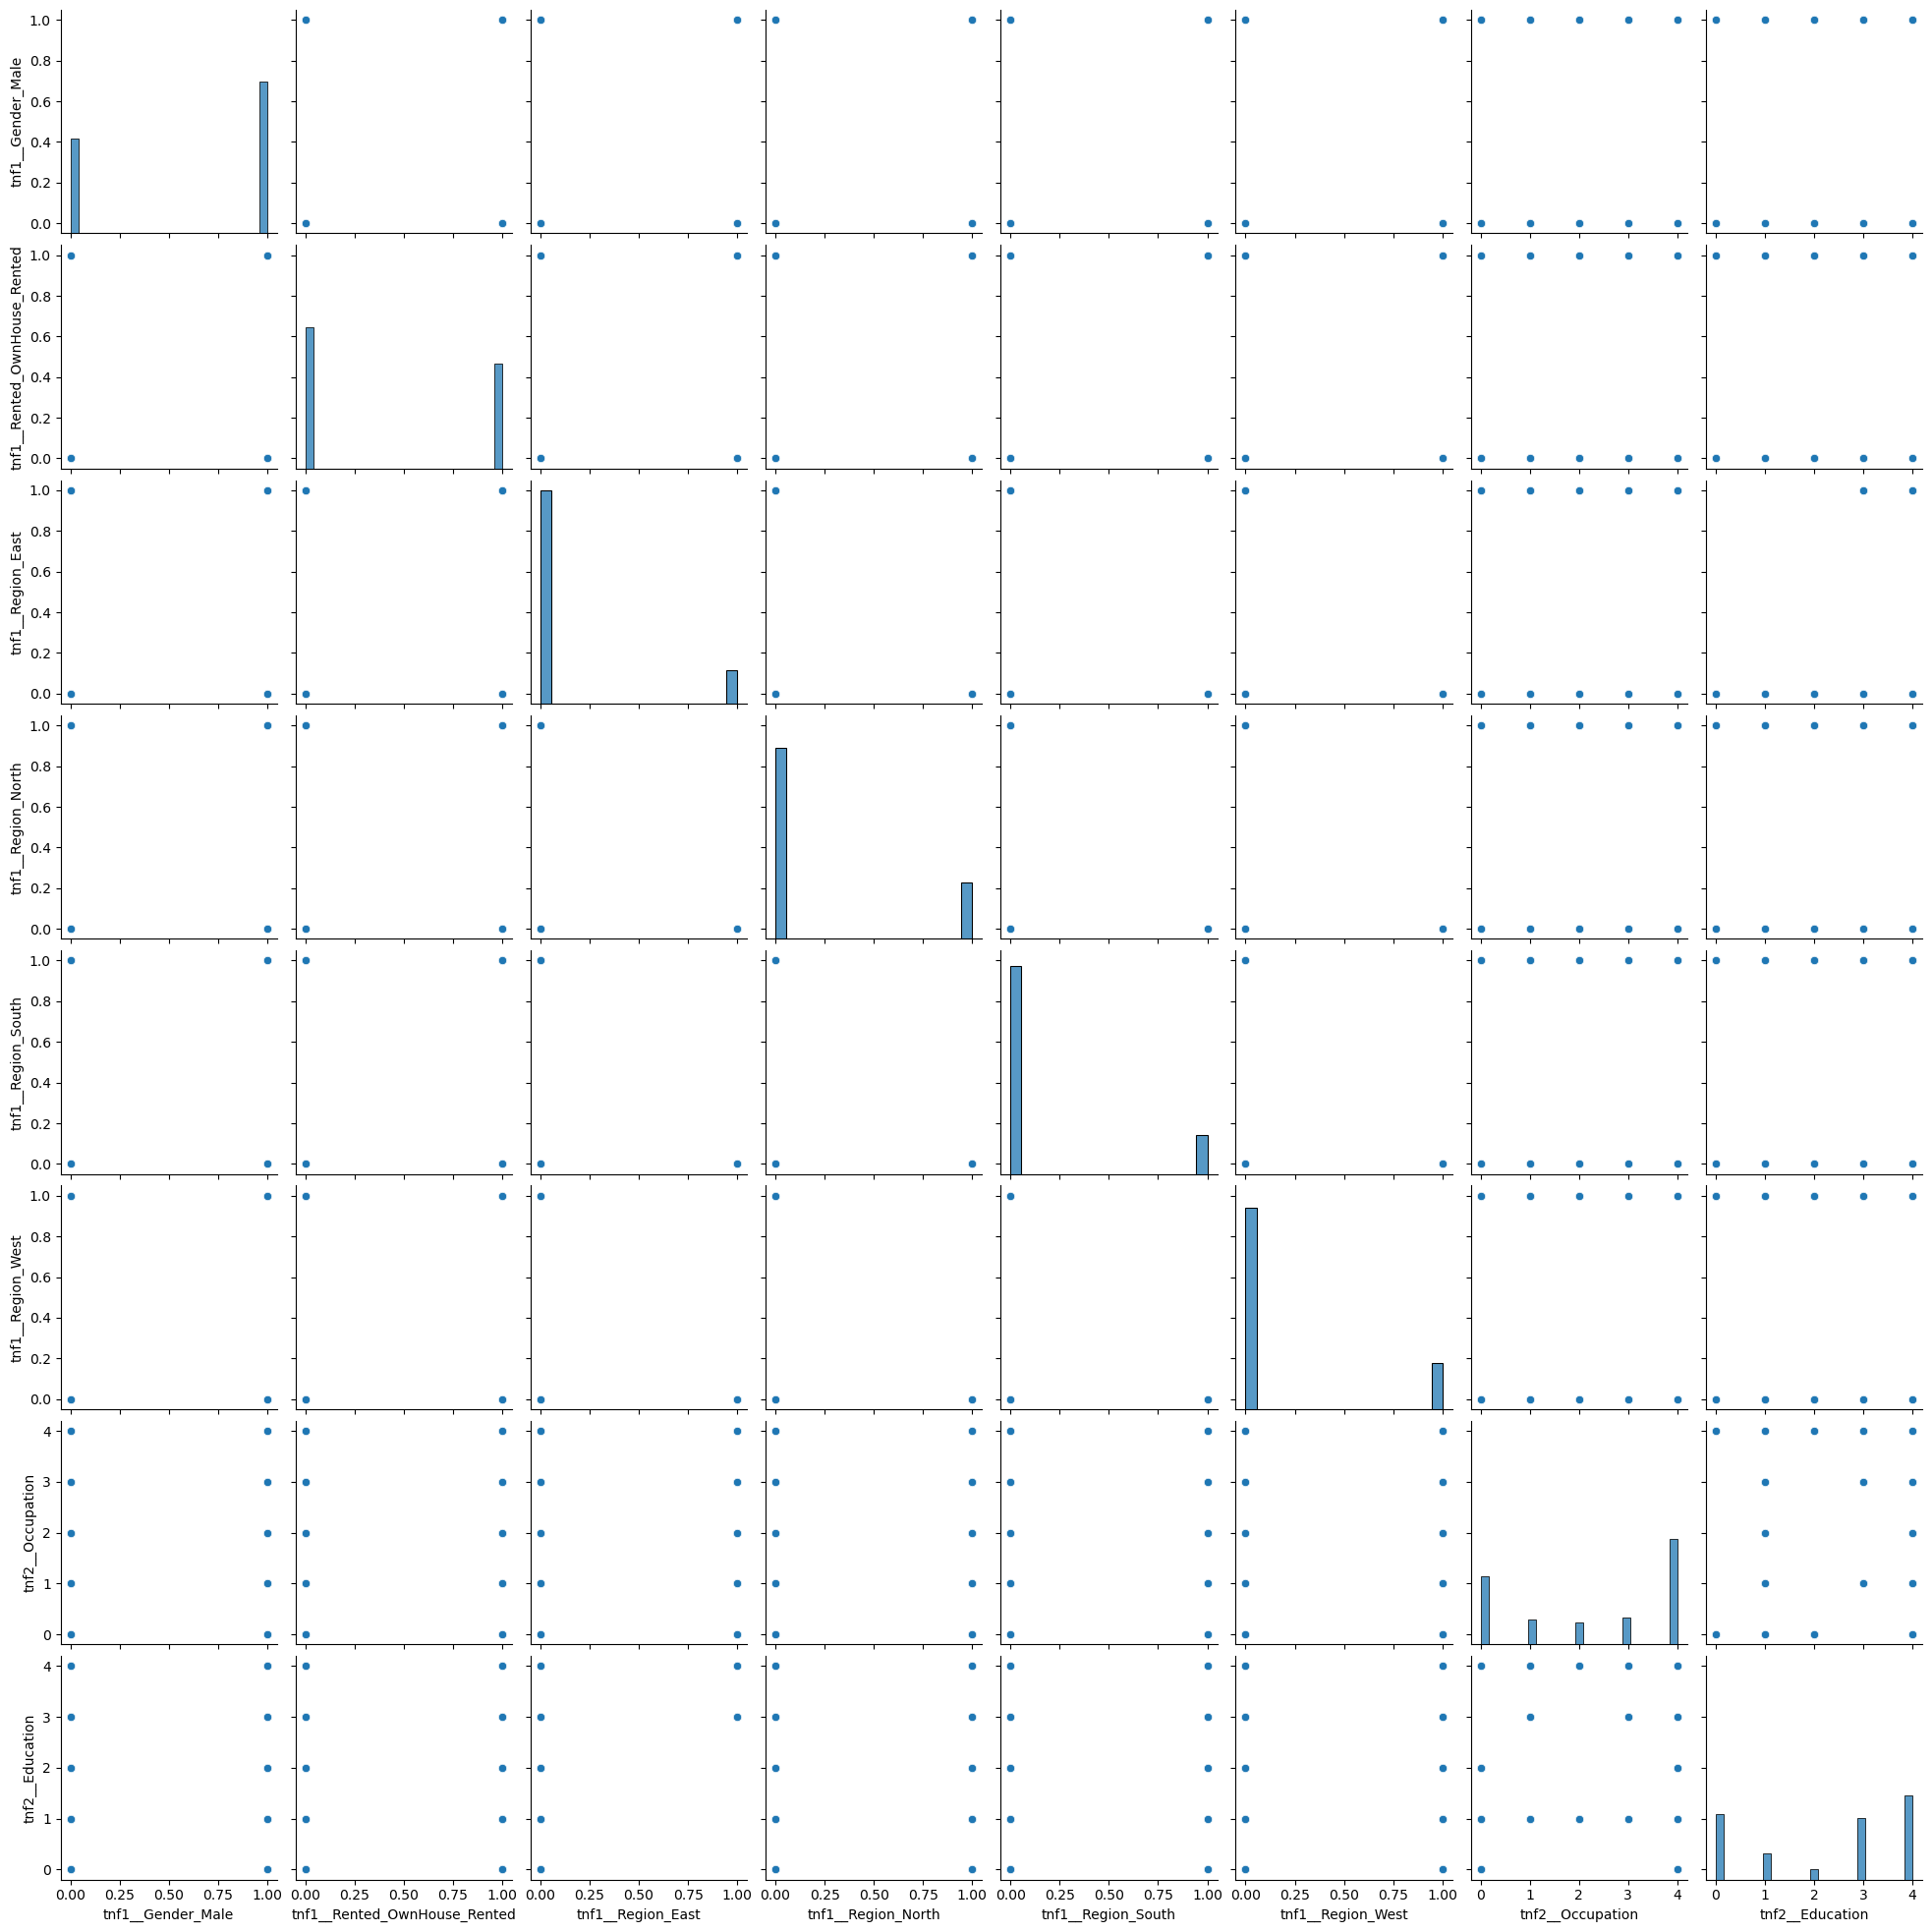

In [54]:
sns.pairplot(categorical_x_train_transformed)
plt.show()

### Multivariate Analysis_Categorical Data

In [55]:
categorical_x_train_transformed.corr()

,tnf1__Gender_Male,tnf1__Rented_OwnHouse_Rented,tnf1__Region_East,tnf1__Region_North,tnf1__Region_South,tnf1__Region_West,tnf2__Occupation,tnf2__Education
tnf1__Gender_Male,1.000000,-0.112435,-0.240945,-0.143582,0.108717,0.251058,-0.037646,0.009349
tnf1__Rented_OwnHouse_Rented,-0.112435,1.000000,0.328679,-0.206816,-0.264575,0.044893,-0.134672,0.085189
tnf1__Region_East,-0.240945,0.328679,1.000000,-0.216014,-0.172412,-0.190107,0.064882,0.252724
tnf1__Region_North,-0.143582,-0.206816,-0.216014,1.000000,-0.234309,-0.258356,0.011040,-0.180303
tnf1__Region_South,0.108717,-0.264575,-0.172412,-0.234309,1.000000,-0.206207,0.264102,-0.052641
tnf1__Region_West,0.251058,0.044893,-0.190107,-0.258356,-0.206207,1.000000,-0.083213,-0.027002
tnf2__Occupation,-0.037646,-0.134672,0.064882,0.011040,0.264102,-0.083213,1.000000,0.113624
tnf2__Education,0.009349,0.085189,0.252724,-0.180303,-0.052641,-0.027002,0.113624,1.000000


In [56]:
categorical_x_train_transformed.describe()

,tnf1__Gender_Male,tnf1__Rented_OwnHouse_Rented,tnf1__Region_East,tnf1__Region_North,tnf1__Region_South,tnf1__Region_West,tnf2__Occupation,tnf2__Education
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.00000,120000.000000,120000.000000,120000.000000
mean,0.615117,0.426625,0.137150,0.226942,0.15755,0.185250,2.311783,2.292025
std,0.486570,0.494589,0.344007,0.418856,0.36432,0.388502,1.708761,1.638603
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,3.000000
75%,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,4.000000


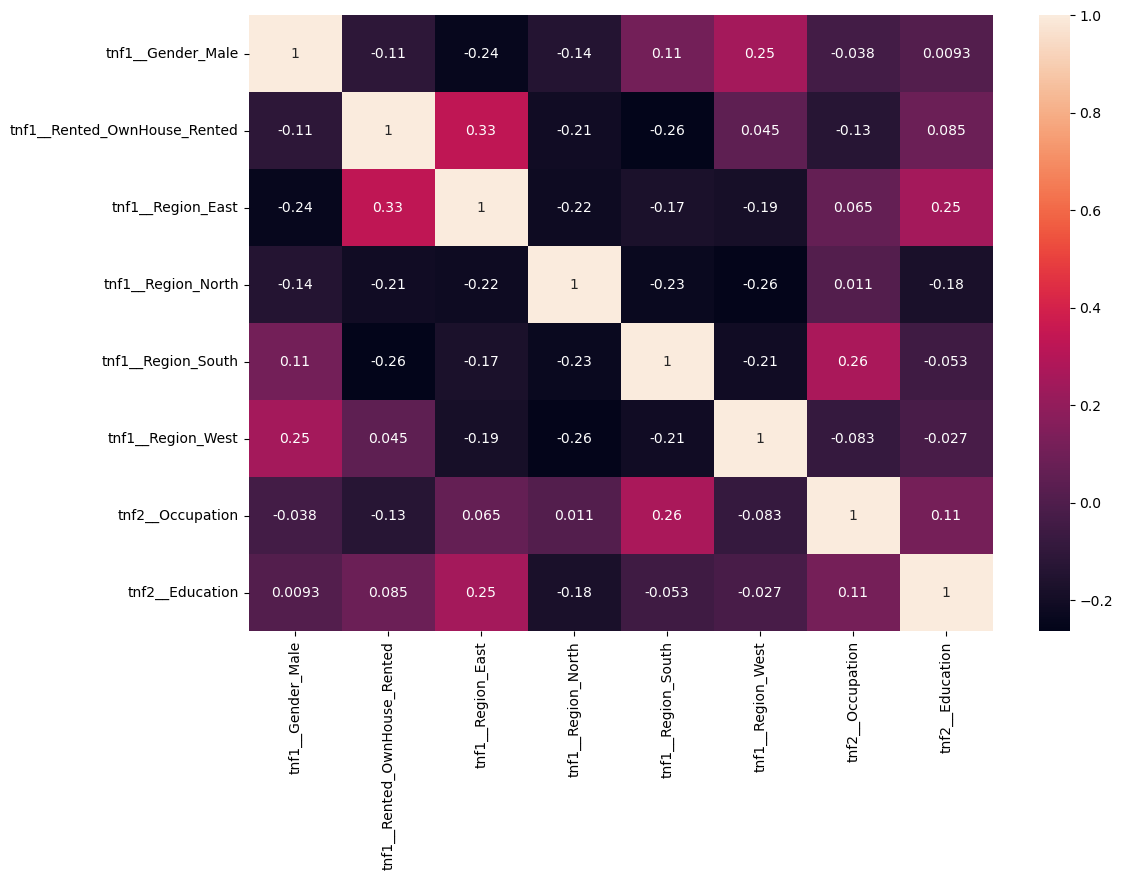

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(categorical_x_train_transformed.corr(), annot=True, )
plt.show()

In [58]:
categorical_x_train_transformed.head()

,tnf1__Gender_Male,tnf1__Rented_OwnHouse_Rented,tnf1__Region_East,tnf1__Region_North,tnf1__Region_South,tnf1__Region_West,tnf2__Occupation,tnf2__Education
0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,4.0,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0


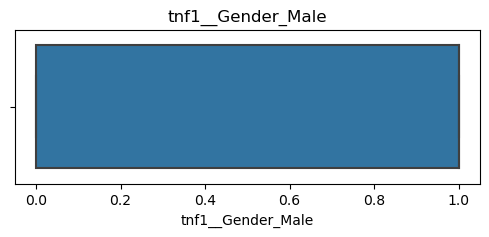

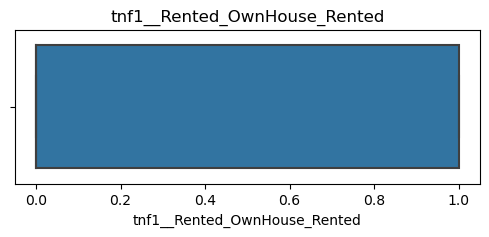

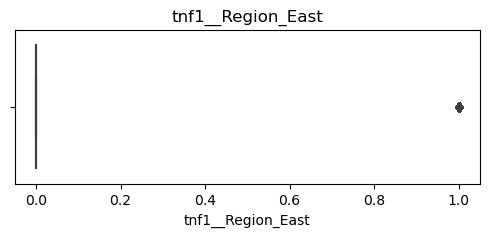

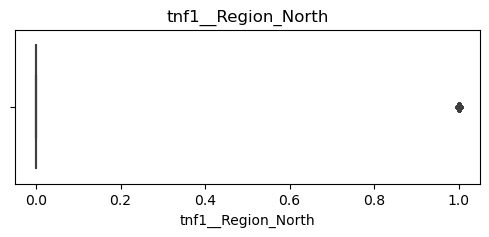

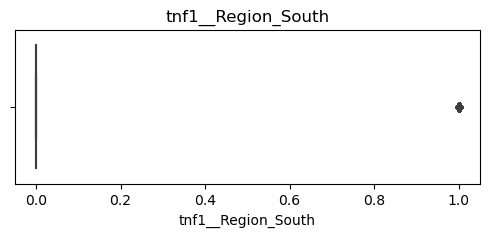

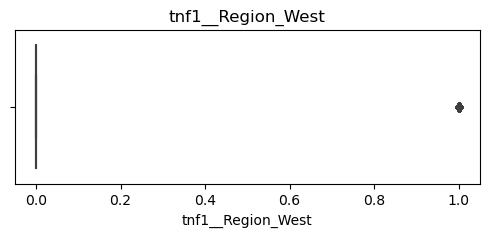

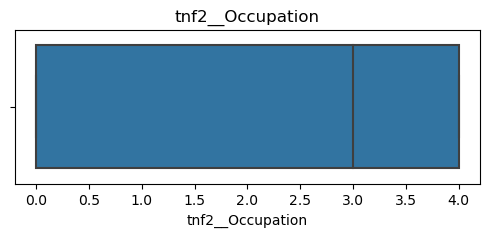

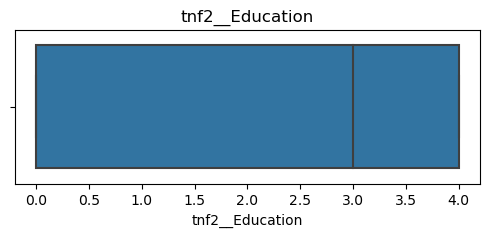

In [59]:
for col in categorical_x_train_transformed.columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=categorical_x_train_transformed[col])
    plt.title(col)
    plt.show()

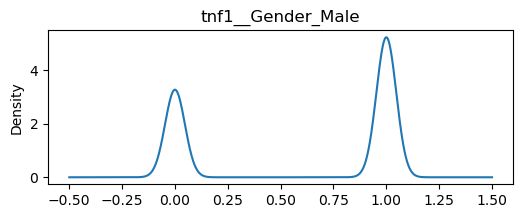

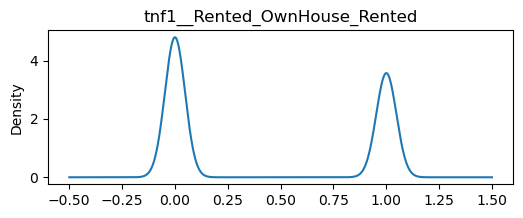

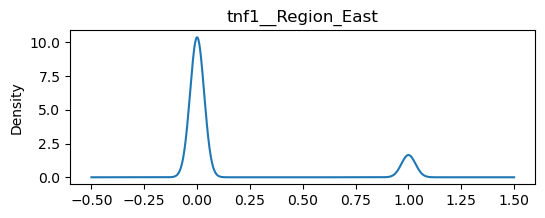

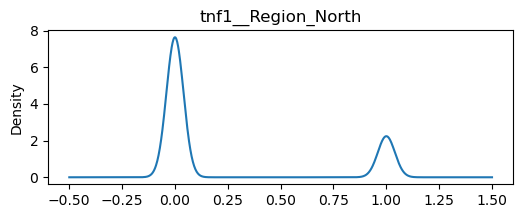

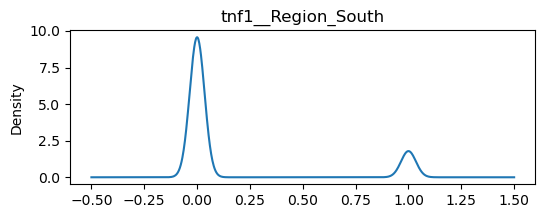

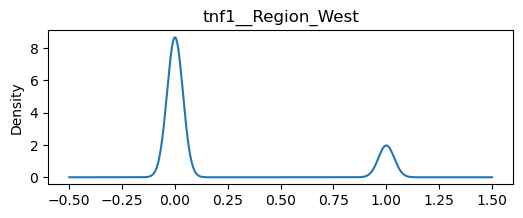

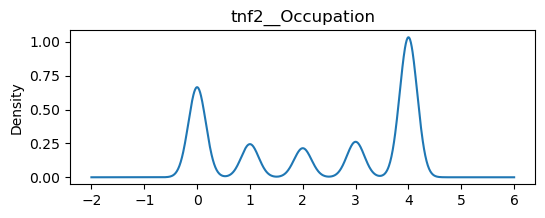

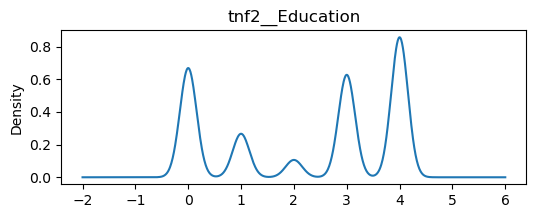

In [60]:
for col in categorical_x_train_transformed.columns:
    plt.figure(figsize=(6,2))
    (categorical_x_train_transformed[col]).plot(kind="kde")
    plt.title(col)
    plt.show()

In [61]:
from sklearn.feature_selection import chi2

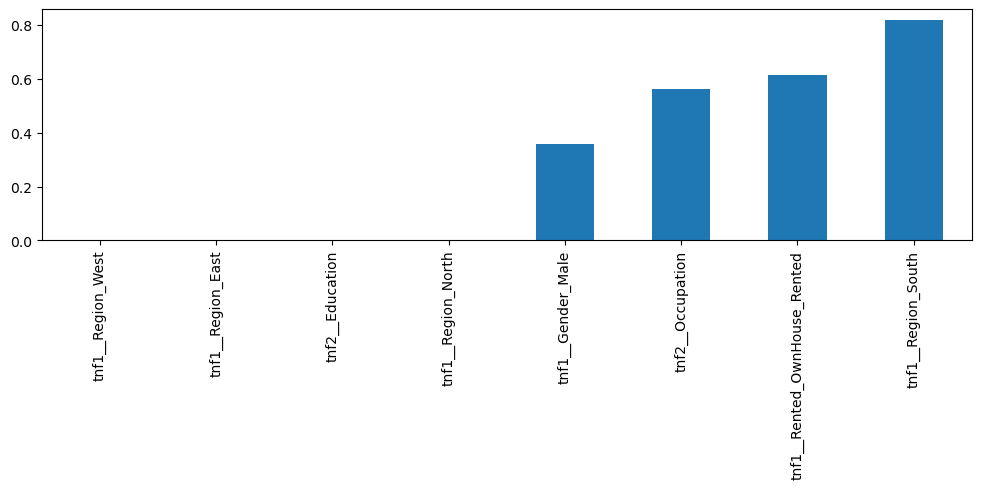

In [99]:
chi_score = chi2(categorical_x_train_transformed, y_train_transformed)
pvalue = pd.Series(chi_score[1], index=categorical_x_train_transformed.columns)
pvalue = pvalue.sort_values(ascending=True)
plt.figure(figsize=(12,3))
pvalue.plot.bar()
plt.show()

In [ ]:
categorical_x_train_transformed = categorical_x_train_transformed.drop(["tnf1__Gender_Male", "tnf2__Occupation", "tnf1__Rented_OwnHouse_Rented", "tnf1__Region_South"], axis=1)

In [ ]:
categorical_x_train_transformed.head()

In [63]:
categorical_x_test_transformed = categorical_x_test_transformed.drop(["tnf1__Gender_Male", "tnf2__Occupation", "tnf1__Rented_OwnHouse_Rented", "tnf1__Region_South"], axis=1)

In [64]:
categorical_x_test_transformed.head()

,tnf1__Region_East,tnf1__Region_North,tnf1__Region_West,tnf2__Education
0,0.0,0.0,1.0,4.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,3.0
3,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,4.0


# Numercal Data

In [65]:
x_train_numerical.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7120,0.0,0.004886,58.0,NaN,0.0,5.000000,3.0,0.0,0.0,0.0,0.0
15178,0.0,0.515895,52.0,4749.0,0.0,0.717053,8.0,0.0,1.0,0.0,2.0
148382,1.0,0.960857,56.0,2720.0,1.0,0.248806,10.0,1.0,0.0,0.0,1.0
30064,0.0,0.018680,79.0,5080.0,0.0,0.005511,5.0,0.0,0.0,0.0,0.0
54607,0.0,0.000000,38.0,4666.0,0.0,0.492608,2.0,0.0,1.0,0.0,0.0


In [66]:
x_train_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 7120 to 40177
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            120000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  120000 non-null  float64
 2   age                                   120000 non-null  float64
 3   MonthlyIncome                         96217 non-null   float64
 4   NumberOfTime30-59DaysPastDueNotWorse  120000 non-null  float64
 5   DebtRatio                             120000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120000 non-null  float64
 7   NumberOfTimes90DaysLate               120000 non-null  float64
 8   NumberRealEstateLoansOrLines          120000 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  120000 non-null  float64
 10  NumberOfDependents                    116832 non-null  float64
dty

In [67]:
x_train_numerical.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
MonthlyIncome                           23783
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3168
dtype: int64

In [68]:
#Null value %:
a = (x_train_numerical["MonthlyIncome"].isnull().sum()/len(x_train_numerical["MonthlyIncome"]))*100
b = (x_train_numerical["NumberOfDependents"].isnull().sum()/len(x_train_numerical["NumberOfDependents"]))*100
print(f"The null values % in MonthlyIncome feature is: {a} %")
print(f"The null values % in NumberOfDependents feature is: {b} %")

The null values % in MonthlyIncome feature is: 19.819166666666664 %
The null values % in NumberOfDependents feature is: 2.64 %


In [69]:
def mean_median_mode(df, var):
    mean = int(df[var].mean())
    median = int(df[var].median())
    mode = int(df[var].mode())
    return mean, median, mode

In [70]:
MI_mean, MI_median, MI_mode = mean_median_mode(x_train_numerical, "MonthlyIncome")
NoD_mean, NoD_median, NoD_mode = mean_median_mode(x_train_numerical, "NumberOfDependents")

In [71]:
def plotting_mean_median_mode(df, var):
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_subplot(1,1,1)
    df[var].plot(kind="kde", ax=ax, legend=var)
    plt.show()
#fig = plt.figure(figsize=(12,4))
#ax = fig.add_subplot(1,2,1)
#x_train_numerical["NumberOfDependents"].plot(kind="kde", ax=ax, legend="NumberOfDependents")
#plt.show()

In [72]:
def replace(df, var, value, name):
    df[var+"_"+name] = df[var].fillna(value)

In [73]:
replace(x_train_numerical, "NumberOfDependents", NoD_mean, "mean_repl")

In [74]:
replace(x_train_numerical, "NumberOfDependents", NoD_median, "median_repl")
replace(x_train_numerical, "NumberOfDependents", NoD_mode, "mode_repl")

In [75]:
x_train_numerical.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NumberOfDependents_mean_repl,NumberOfDependents_median_repl,NumberOfDependents_mode_repl
7120,0.0,0.004886,58.0,NaN,0.0,5.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15178,0.0,0.515895,52.0,4749.0,0.0,0.717053,8.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0
148382,1.0,0.960857,56.0,2720.0,1.0,0.248806,10.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
30064,0.0,0.018680,79.0,5080.0,0.0,0.005511,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54607,0.0,0.000000,38.0,4666.0,0.0,0.492608,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


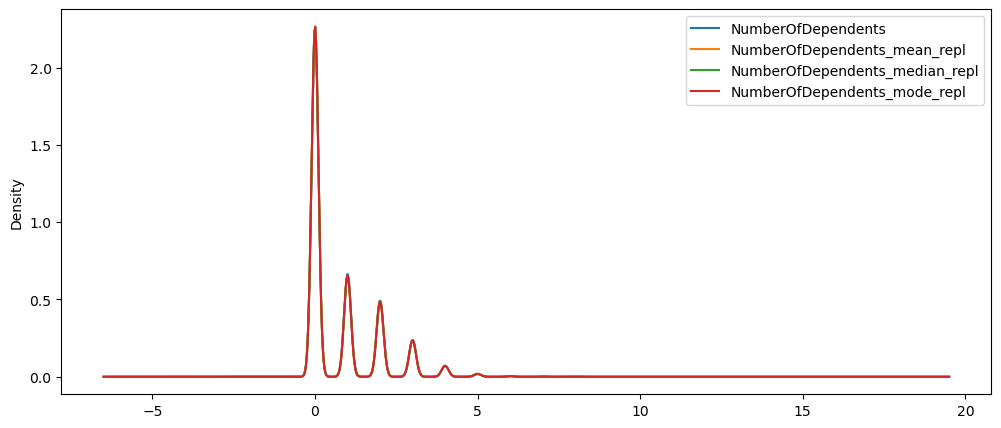

In [76]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
x_train_numerical["NumberOfDependents"].plot(kind="kde", ax=ax, legend="NumberOfDependents")
x_train_numerical["NumberOfDependents_mean_repl"].plot(kind="kde", ax=ax, legend="NumberOfDependents_mean_repl")
x_train_numerical["NumberOfDependents_median_repl"].plot(kind="kde", ax=ax, legend="NumberOfDependents_median_repl")
x_train_numerical["NumberOfDependents_mode_repl"].plot(kind="kde", ax=ax, legend="NumberOfDependents_mode_repl")
plt.show()

In [77]:
def random_replace(df, var):
    df[var+"_random"] = df[var].copy()
    sample = df[var].dropna().sample(df[var].isnull().sum(), random_state=12)
    sample.index = df[df[var].isnull()].index
    df.loc[df[var].isnull(), var+"_random"] = sample

In [78]:
random_replace(x_train_numerical, "NumberOfDependents")

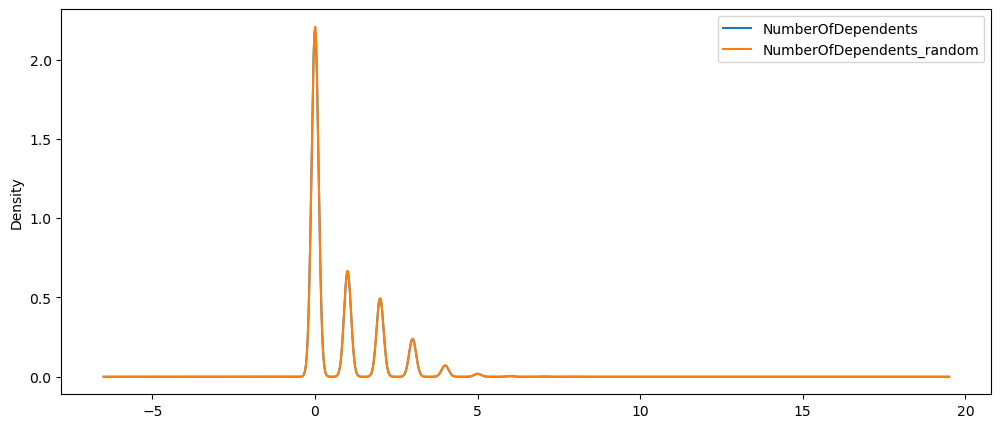

In [79]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
x_train_numerical["NumberOfDependents"].plot(kind="kde", ax=ax, legend="NumberOfDependents")
#x_train_numerical["NumberOfDependents_mean_repl"].plot(kind="kde", ax=ax, legend="NumberOfDependents_mean_repl")
#x_train_numerical["NumberOfDependents_median_repl"].plot(kind="kde", ax=ax, legend="NumberOfDependents_median_repl")
#x_train_numerical["NumberOfDependents_mode_repl"].plot(kind="kde", ax=ax, legend="NumberOfDependents_mode_repl")
x_train_numerical["NumberOfDependents_random"].plot(kind="kde", ax=ax, legend="NumberOfDependents_random")
plt.show()

In [80]:
a = []
for col in x_train_numerical.columns:
    if col in ["NumberOfDependents", "NumberOfDependents_mean_repl", "NumberOfDependents_median_repl", "NumberOfDependents_mode_repl", "NumberOfDependents_random"]:
        mean, median, mode = mean_median_mode(x_train_numerical, col)
        std = x_train_numerical[col].std()
        a.append([col, mean, median, mode, std])
a = pd.DataFrame(a, columns=["Name", "Mean", "Median", "Mode", "Std"])
a

,Name,Mean,Median,Mode,Std
0,NumberOfDependents,0,0,0,1.113624
1,NumberOfDependents_mean_repl,0,0,0,1.105494
2,NumberOfDependents_median_repl,0,0,0,1.105494
3,NumberOfDependents_mode_repl,0,0,0,1.105494
4,NumberOfDependents_random,0,0,0,1.113449


In [81]:
x_train_numerical = x_train_numerical.drop(["NumberOfDependents", "NumberOfDependents_mean_repl", "NumberOfDependents_median_repl", "NumberOfDependents_mode_repl"], axis=1)

In [82]:
x_train_numerical.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents_random
7120,0.0,0.004886,58.0,NaN,0.0,5.000000,3.0,0.0,0.0,0.0,0.0
15178,0.0,0.515895,52.0,4749.0,0.0,0.717053,8.0,0.0,1.0,0.0,2.0
148382,1.0,0.960857,56.0,2720.0,1.0,0.248806,10.0,1.0,0.0,0.0,1.0
30064,0.0,0.018680,79.0,5080.0,0.0,0.005511,5.0,0.0,0.0,0.0,0.0
54607,0.0,0.000000,38.0,4666.0,0.0,0.492608,2.0,0.0,1.0,0.0,0.0


In [83]:
replace(x_train_numerical, "MonthlyIncome", MI_mean, "mean_repl")
replace(x_train_numerical, "MonthlyIncome", MI_median, "median_repl")
replace(x_train_numerical, "MonthlyIncome", MI_mode, "mode_repl")

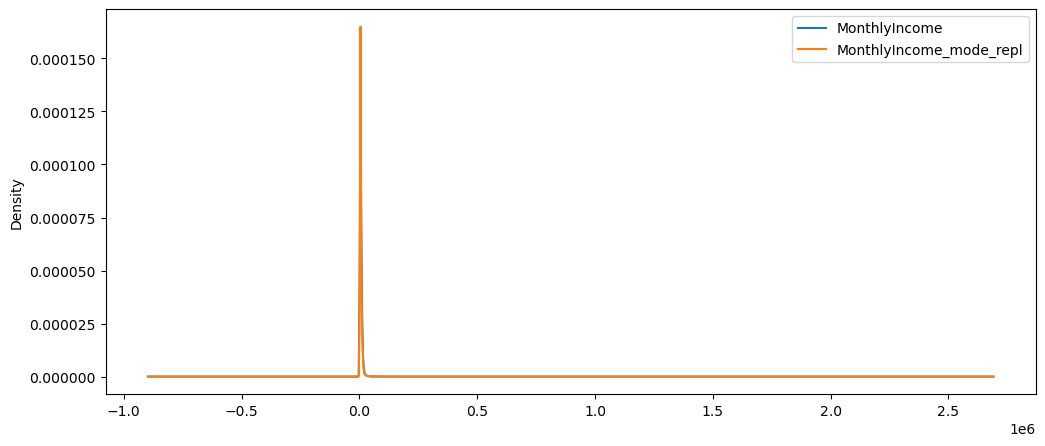

In [84]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
x_train_numerical["MonthlyIncome"].plot(kind="kde", ax=ax, legend="MonthlyIncome")
#x_train_numerical["MonthlyIncome_mean_repl"].plot(kind="kde", ax=ax, legend="MonthlyIncome_mean_repl")
#x_train_numerical["MonthlyIncome_median_repl"].plot(kind="kde", ax=ax, legend="MonthlyIncome_median_repl")
x_train_numerical["MonthlyIncome_mode_repl"].plot(kind="kde", ax=ax, legend="MonthlyIncome_mode_repl")
plt.show()

In [85]:
random_replace(x_train_numerical, "MonthlyIncome")

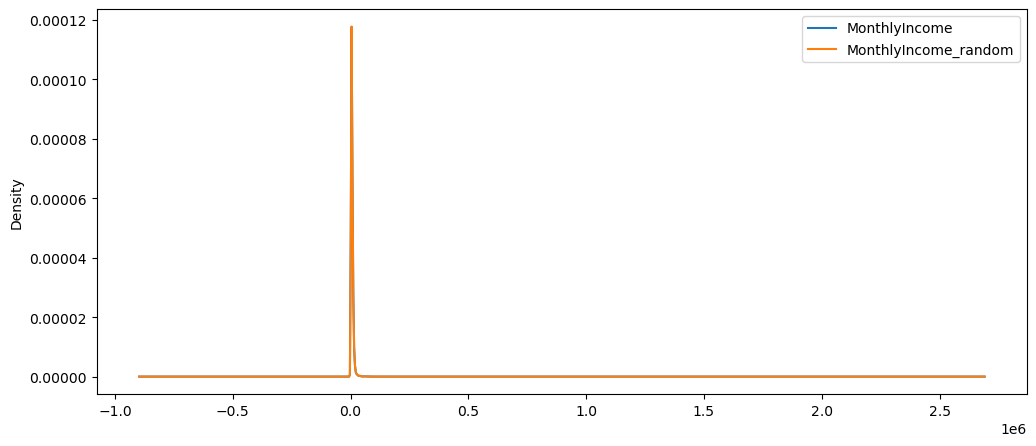

In [86]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
x_train_numerical["MonthlyIncome"].plot(kind="kde", ax=ax, legend="MonthlyIncome")
#x_train_numerical["MonthlyIncome_mean_repl"].plot(kind="kde", ax=ax, legend="MonthlyIncome_mean_repl")
#x_train_numerical["MonthlyIncome_median_repl"].plot(kind="kde", ax=ax, legend="MonthlyIncome_median_repl")
#x_train_numerical["MonthlyIncome_mode_repl"].plot(kind="kde", ax=ax, legend="MonthlyIncome_mode_repl")
x_train_numerical["MonthlyIncome_random"].plot(kind="kde", ax=ax, legend="MonthlyIncome_random")
plt.show()

In [87]:
actual = []
for col in x_train_numerical.columns:
    if col in ["MonthlyIncome", "MonthlyIncome_mean_repl", "MonthlyIncome_median_repl", "MonthlyIncome_mode_repl", "MonthlyIncome_random"]:
        mean, median, mode = mean_median_mode(x_train_numerical, col)
        std = x_train_numerical[col].std()
        actual.append([col, mean, median, mode, std])
actual = pd.DataFrame(actual, columns=["Column_Name", "Mean", "Median", "Mode", "std"])
actual

,Column_Name,Mean,Median,Mode,std
0,MonthlyIncome,6638,5400,5000,11716.573589
1,MonthlyIncome_mean_repl,6638,6595,6638,10491.448669
2,MonthlyIncome_median_repl,6392,5400,5400,10503.052848
3,MonthlyIncome_mode_repl,6313,5000,5000,10511.753151
4,MonthlyIncome_random,6642,5400,5000,12259.719736


In [88]:
x_train_numerical = x_train_numerical.drop(["MonthlyIncome", "MonthlyIncome_mean_repl", "MonthlyIncome_median_repl", "MonthlyIncome_mode_repl"], axis=1)

In [89]:
x_train_numerical.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents_random,MonthlyIncome_random
7120,0.0,0.004886,58.0,0.0,5.000000,3.0,0.0,0.0,0.0,0.0,3000.0
15178,0.0,0.515895,52.0,0.0,0.717053,8.0,0.0,1.0,0.0,2.0,4749.0
148382,1.0,0.960857,56.0,1.0,0.248806,10.0,1.0,0.0,0.0,1.0,2720.0
30064,0.0,0.018680,79.0,0.0,0.005511,5.0,0.0,0.0,0.0,0.0,5080.0
54607,0.0,0.000000,38.0,0.0,0.492608,2.0,0.0,1.0,0.0,0.0,4666.0


In [90]:
x_test_numerical.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
MonthlyIncome                           5948
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       756
dtype: int64

In [91]:
random_replace(x_test_numerical, "MonthlyIncome")
random_replace(x_test_numerical, "NumberOfDependents")

In [92]:
x_test_numerical = x_test_numerical.drop(["MonthlyIncome", "NumberOfDependents"], axis=1)

In [93]:
x_test_numerical.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_random,NumberOfDependents_random
40802,1.0,0.853506,67.0,3.0,1.146778,7.0,3.0,1.0,0.0,2513.0,1.0
97167,1.0,0.596972,53.0,0.0,2620.000000,13.0,0.0,1.0,0.0,13800.0,0.0
14472,0.0,0.308867,43.0,0.0,0.191476,15.0,0.0,3.0,0.0,29000.0,4.0
2258,0.0,0.032604,66.0,0.0,0.641992,9.0,0.0,0.0,0.0,5200.0,0.0
61557,0.0,0.621414,78.0,0.0,4865.000000,16.0,0.0,2.0,0.0,2667.0,0.0


### Univariate Analysis

In [94]:
def numerical_plotting(df, var):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    df[var].plot(kind="kde")
    plt.title(var)
    plt.subplot(1,3,2)
    sns.histplot(data=df, x=var)
    plt.subplot(1,3,3)
    sns.boxplot(data=df, x=var)
    plt.show()

In [ ]:
for col in x_train_numerical.columns:
    numerical_plotting(x_train_numerical, col)

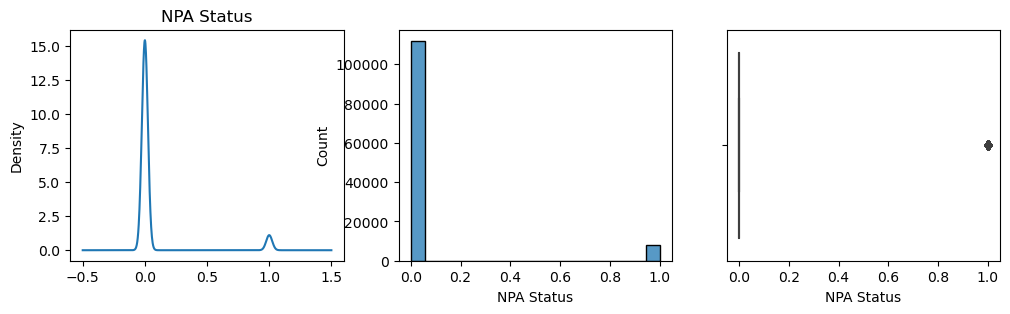

In [100]:
numerical_plotting(x_train_numerical, "NPA Status")

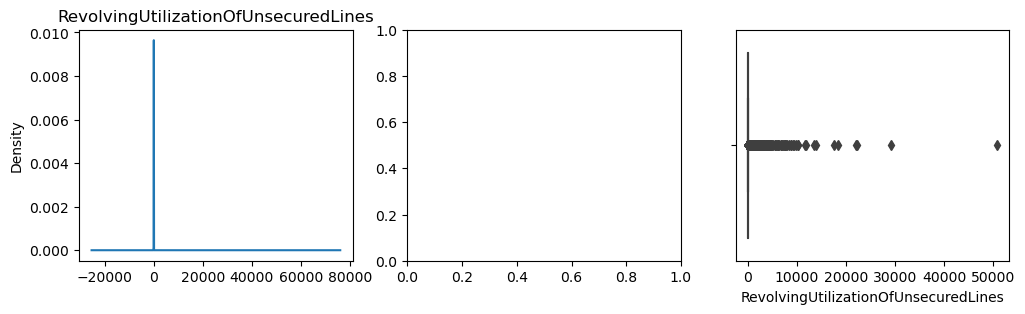

In [111]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
x_train_numerical["RevolvingUtilizationOfUnsecuredLines"].plot(kind="kde")
plt.title("RevolvingUtilizationOfUnsecuredLines")
plt.subplot(1,3,2)
#sns.histplot(data=x_train_numerical, x="RevolvingUtilizationOfUnsecuredLines")
plt.subplot(1,3,3)
sns.boxplot(data=x_train_numerical, x="RevolvingUtilizationOfUnsecuredLines")
plt.show()
#Histogram is not generating as processor is unable to generate it. 

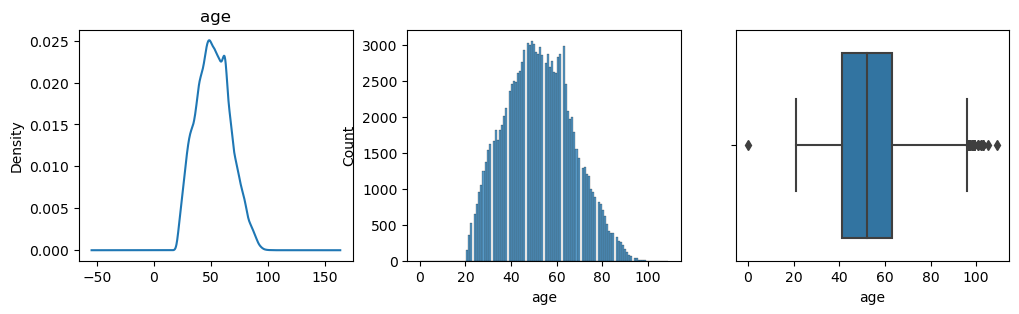

In [107]:
numerical_plotting(x_train_numerical, "age")

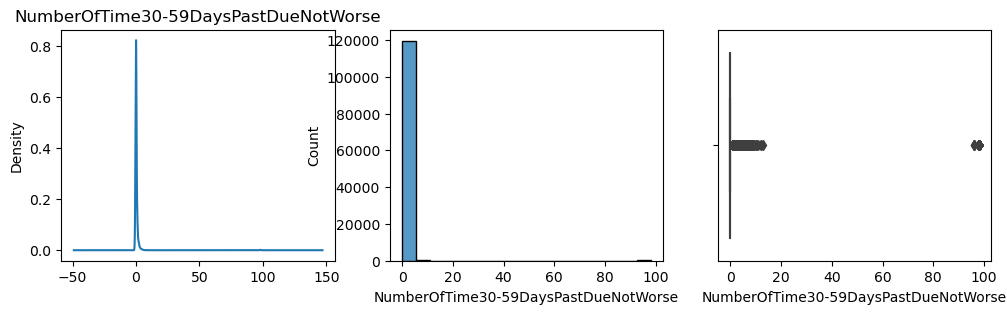

In [91]:
numerical_plotting(x_train_numerical, "NumberOfTime30-59DaysPastDueNotWorse")

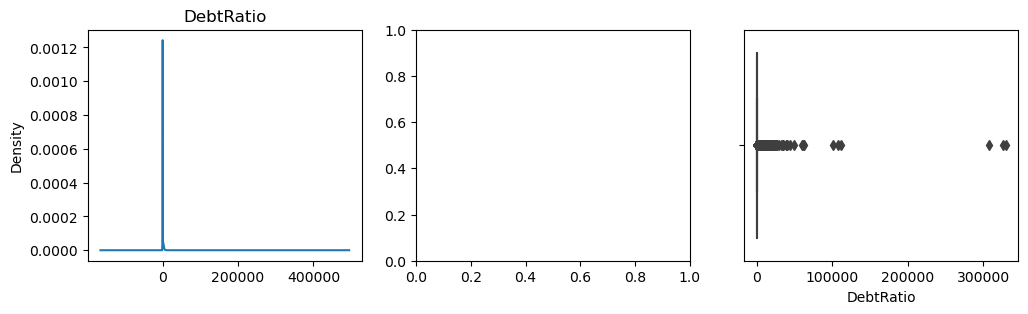

In [115]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
x_train_numerical["DebtRatio"].plot(kind="kde")
plt.title("DebtRatio")
plt.subplot(1,3,2)
#sns.histplot(data=x_train_numerical, x="DebtRatio")
plt.subplot(1,3,3)
sns.boxplot(data=x_train_numerical, x="DebtRatio")
plt.show()
#Histogram is not generating as processor is unable to generate it.

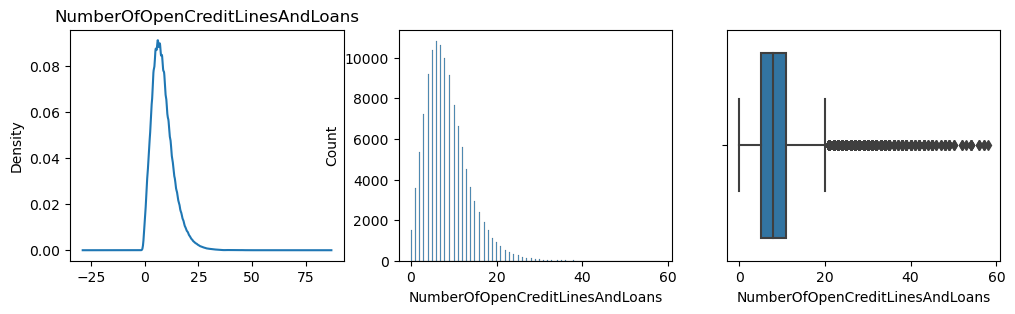

In [103]:
numerical_plotting(x_train_numerical, "NumberOfOpenCreditLinesAndLoans")

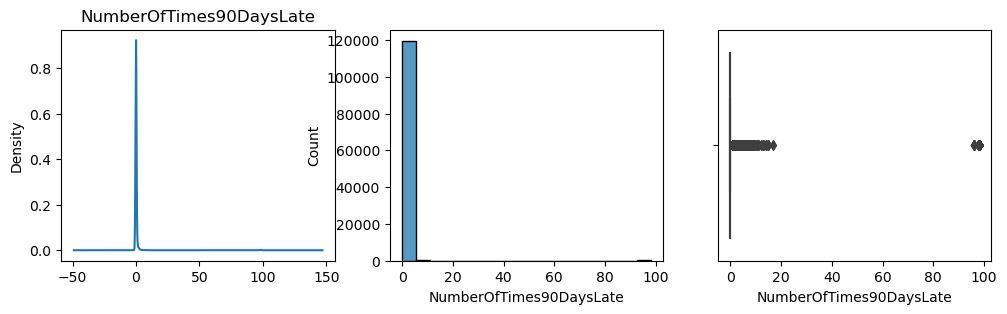

In [104]:
numerical_plotting(x_train_numerical, "NumberOfTimes90DaysLate")

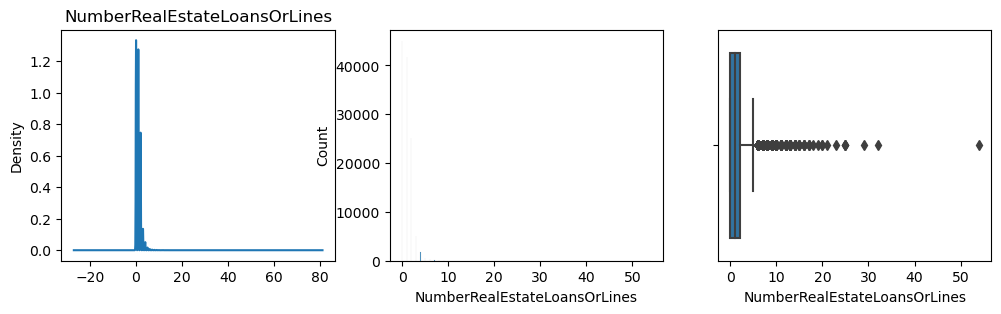

In [105]:
numerical_plotting(x_train_numerical, "NumberRealEstateLoansOrLines")

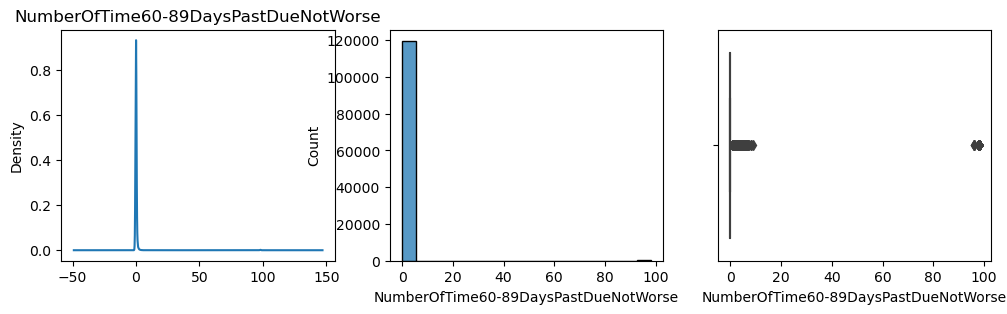

In [106]:
numerical_plotting(x_train_numerical, "NumberOfTime60-89DaysPastDueNotWorse")

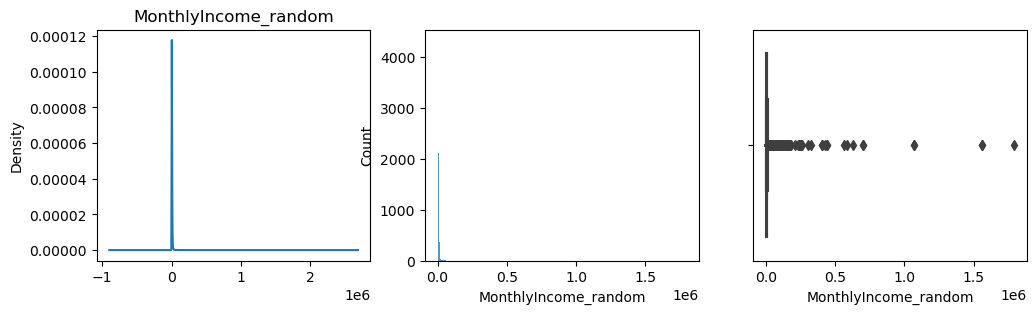

In [94]:
numerical_plotting(x_train_numerical, "MonthlyIncome_random")

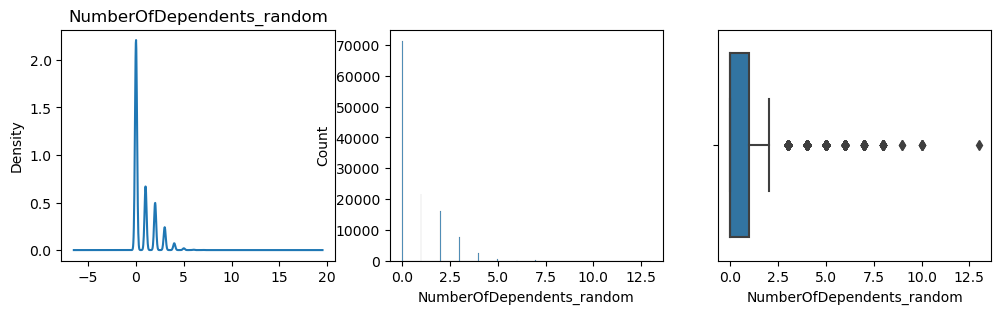

In [93]:
numerical_plotting(x_train_numerical, "NumberOfDependents_random")

### Bi-Variate Analysis_Numerical_Data

In [117]:
x_train_numerical.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents_random,MonthlyIncome_random
7120,0.0,0.004886,58.0,0.0,5.000000,3.0,0.0,0.0,0.0,0.0,3000.0
15178,0.0,0.515895,52.0,0.0,0.717053,8.0,0.0,1.0,0.0,2.0,4749.0
148382,1.0,0.960857,56.0,1.0,0.248806,10.0,1.0,0.0,0.0,1.0,2720.0
30064,0.0,0.018680,79.0,0.0,0.005511,5.0,0.0,0.0,0.0,0.0,5080.0
54607,0.0,0.000000,38.0,0.0,0.492608,2.0,0.0,1.0,0.0,0.0,4666.0


In [177]:
corr = x_train_numerical.corr()
corr

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents_random,MonthlyIncome_random
NPA Status,1.000000,-0.001015,-0.112787,0.123923,-0.006780,-0.028521,0.116193,-0.006406,0.100779,0.045399,-0.019764
RevolvingUtilizationOfUnsecuredLines,-0.001015,1.000000,-0.004065,-0.001332,0.004713,-0.009975,-0.001092,0.007963,-0.000997,0.001323,0.007053
age,-0.112787,-0.004065,1.000000,-0.063300,0.025238,0.149627,-0.061813,0.032634,-0.057808,-0.204144,0.033167
NumberOfTime30-59DaysPastDueNotWorse,0.123923,-0.001332,-0.063300,1.000000,-0.006201,-0.055969,0.983672,-0.031049,0.987145,-0.003321,-0.006969
DebtRatio,-0.006780,0.004713,0.025238,-0.006201,1.000000,0.050761,-0.008321,0.116136,-0.007531,-0.038685,-0.007603
NumberOfOpenCreditLinesAndLoans,-0.028521,-0.009975,0.149627,-0.055969,0.050761,1.000000,-0.080585,0.434116,-0.071583,0.064146,0.084263
NumberOfTimes90DaysLate,0.116193,-0.001092,-0.061813,0.983672,-0.008321,-0.080585,1.000000,-0.045579,0.992750,-0.010488,-0.008819
NumberRealEstateLoansOrLines,-0.006406,0.007963,0.032634,-0.031049,0.116136,0.434116,-0.045579,1.000000,-0.039936,0.121480,0.116236
NumberOfTime60-89DaysPastDueNotWorse,0.100779,-0.000997,-0.057808,0.987145,-0.007531,-0.071583,0.992750,-0.039936,1.000000,-0.011110,-0.007735
NumberOfDependents_random,0.045399,0.001323,-0.204144,-0.003321,-0.038685,0.064146,-0.010488,0.121480,-0.011110,1.000000,0.059073


In [159]:
def num_bivariate(df, var):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    sns.boxplot(x=var,y=y_train, data=df, palette='rainbow')
    plt.subplot(1,3,2)
    sns.violinplot(x=var, y=y_train, data=df, palette='rainbow')
    plt.subplot(1,3,3)
    plt.scatter(df[var], y_train)
    plt.show()

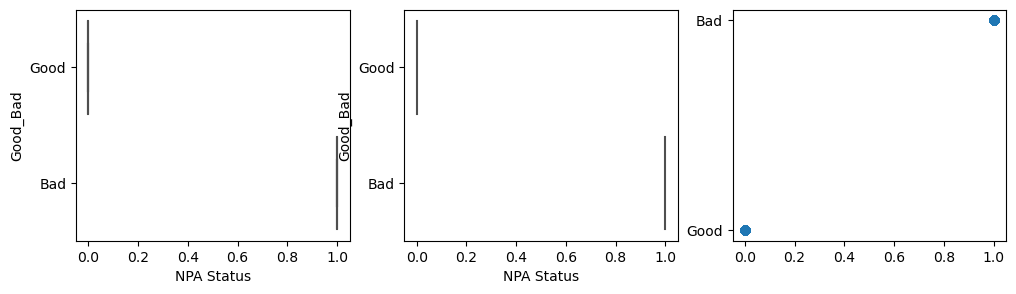

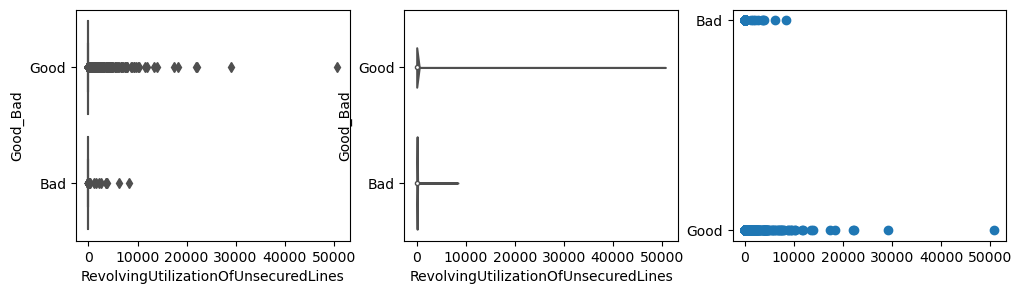

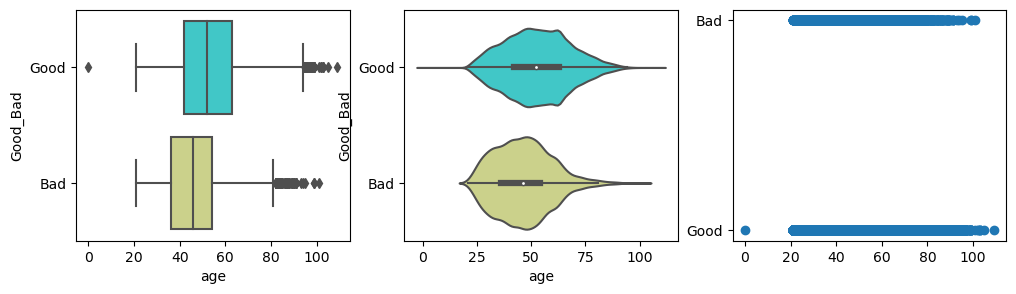

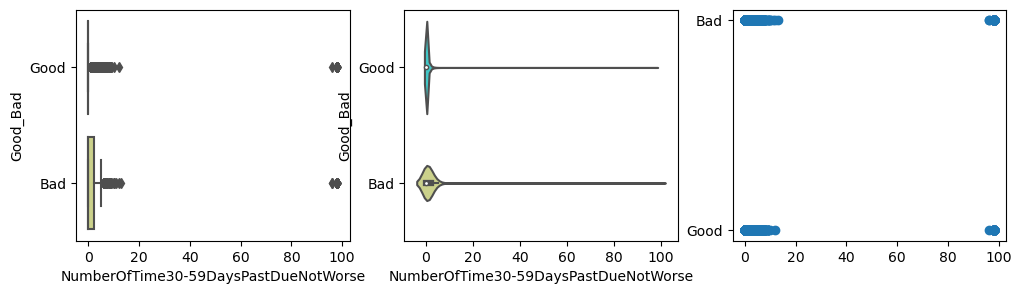

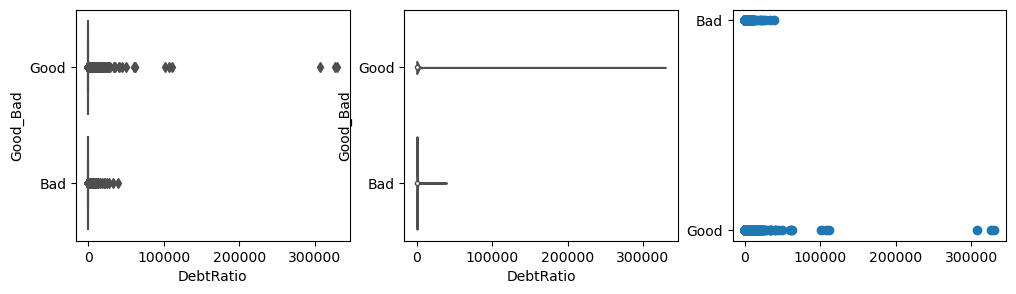

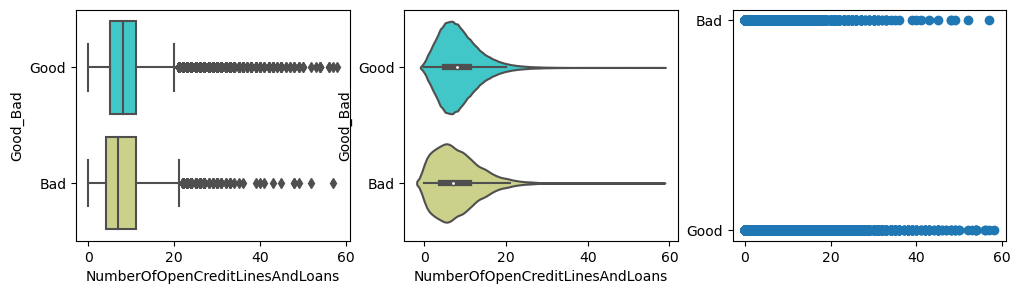

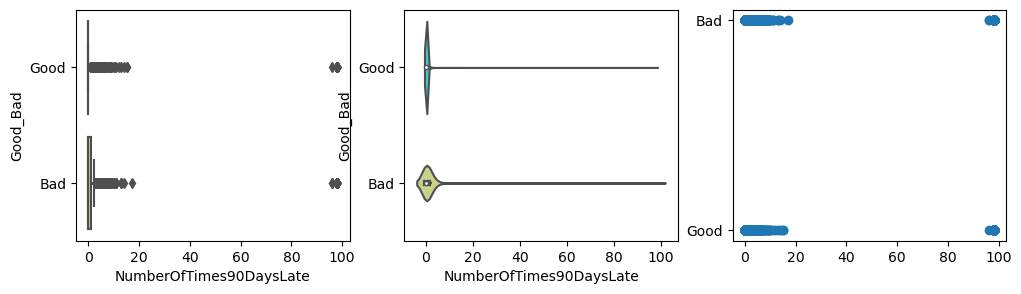

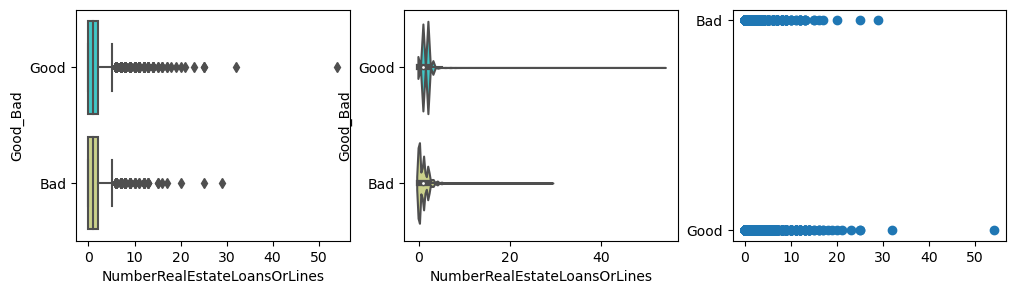

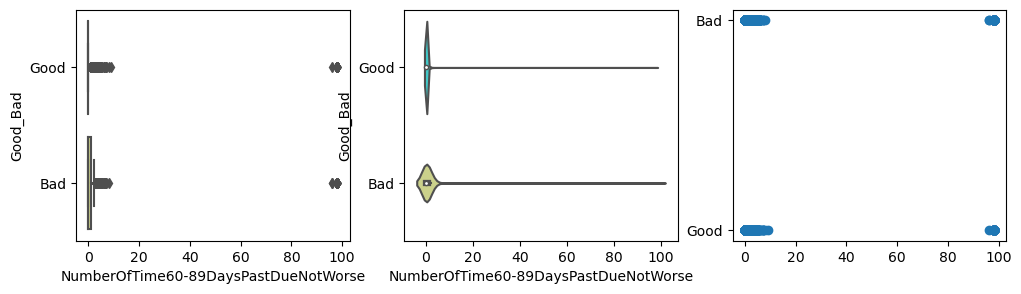

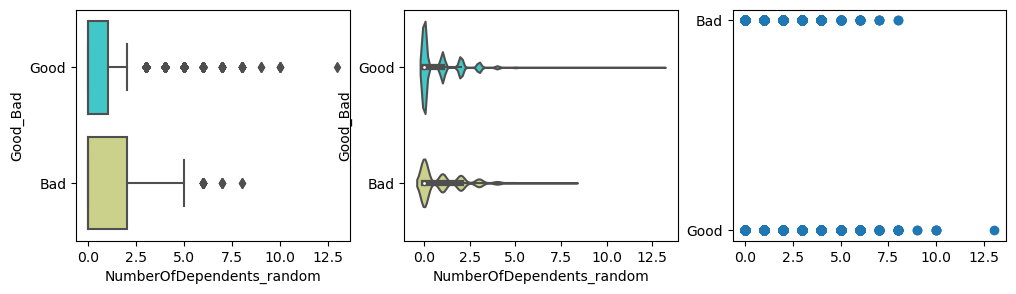

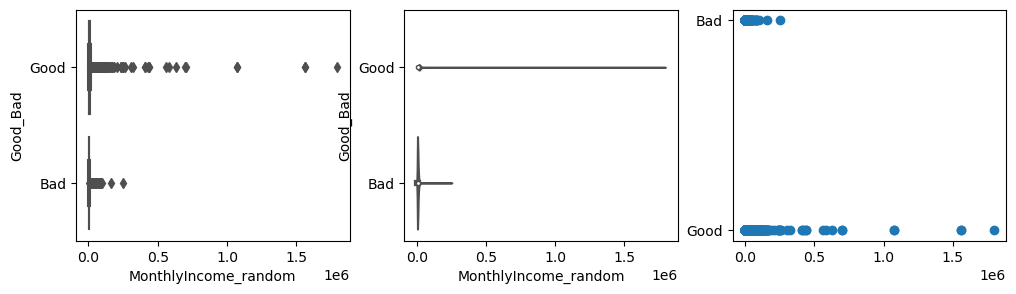

In [160]:
for col in x_train_numerical.columns:
    num_bivariate(x_train_numerical, col)

In [ ]:
sns.pairplot(x_train_numerical)
#Paiplot is not generating, CPU is ot giving the plot.

### Multivariate Analysis

In [179]:
x_train_numerical.corr()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents_random,MonthlyIncome_random
NPA Status,1.000000,-0.001015,-0.112787,0.123923,-0.006780,-0.028521,0.116193,-0.006406,0.100779,0.045399,-0.019764
RevolvingUtilizationOfUnsecuredLines,-0.001015,1.000000,-0.004065,-0.001332,0.004713,-0.009975,-0.001092,0.007963,-0.000997,0.001323,0.007053
age,-0.112787,-0.004065,1.000000,-0.063300,0.025238,0.149627,-0.061813,0.032634,-0.057808,-0.204144,0.033167
NumberOfTime30-59DaysPastDueNotWorse,0.123923,-0.001332,-0.063300,1.000000,-0.006201,-0.055969,0.983672,-0.031049,0.987145,-0.003321,-0.006969
DebtRatio,-0.006780,0.004713,0.025238,-0.006201,1.000000,0.050761,-0.008321,0.116136,-0.007531,-0.038685,-0.007603
NumberOfOpenCreditLinesAndLoans,-0.028521,-0.009975,0.149627,-0.055969,0.050761,1.000000,-0.080585,0.434116,-0.071583,0.064146,0.084263
NumberOfTimes90DaysLate,0.116193,-0.001092,-0.061813,0.983672,-0.008321,-0.080585,1.000000,-0.045579,0.992750,-0.010488,-0.008819
NumberRealEstateLoansOrLines,-0.006406,0.007963,0.032634,-0.031049,0.116136,0.434116,-0.045579,1.000000,-0.039936,0.121480,0.116236
NumberOfTime60-89DaysPastDueNotWorse,0.100779,-0.000997,-0.057808,0.987145,-0.007531,-0.071583,0.992750,-0.039936,1.000000,-0.011110,-0.007735
NumberOfDependents_random,0.045399,0.001323,-0.204144,-0.003321,-0.038685,0.064146,-0.010488,0.121480,-0.011110,1.000000,0.059073


#### Handling Outlier

In [181]:
x_train_numerical.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents_random,MonthlyIncome_random
7120,0.0,0.004886,58.0,0.0,5.000000,3.0,0.0,0.0,0.0,0.0,3000.0
15178,0.0,0.515895,52.0,0.0,0.717053,8.0,0.0,1.0,0.0,2.0,4749.0
148382,1.0,0.960857,56.0,1.0,0.248806,10.0,1.0,0.0,0.0,1.0,2720.0
30064,0.0,0.018680,79.0,0.0,0.005511,5.0,0.0,0.0,0.0,0.0,5080.0
54607,0.0,0.000000,38.0,0.0,0.492608,2.0,0.0,1.0,0.0,0.0,4666.0


In [97]:
label = LabelEncoder()

In [98]:
y_train_transformed = label.fit_transform(y_train)
y_train_transformed = pd.DataFrame(y_train_transformed)
y_train_transformed.head()

,0
0,1
1,1
2,0
3,1
4,1
